In [271]:
import pandas as pd
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt


logData=pd.read_csv('data/FullParticipationLog.csv')
trkData=pd.read_csv('data/EMA_R2 - Overview.csv')
tcqData=pd.read_csv('data/TCQ_numeric.csv')

trkData.dropna(axis=0, how='all', inplace=True)
trkData.dropna(axis=1, how='all', inplace=True)

# get Participant ID #'s from strings
trkData['Participant ID\nCount: 212']=trkData['Participant ID\nCount: 212'].str.split(' ', expand=True,n=1).loc[:,1].astype(int)
trkData.set_index('Participant ID\nCount: 212', drop=True, inplace=True)
trkData.sort_index(inplace=True)
trkData.drop(columns=['Email', 'First Name', 'Last Name', 'Study Complete\nTotal: 213'], inplace=True)

In [272]:
notifCount=pd.DataFrame(columns=['R_and_R', 'R_and_NN', 'NS_and_R', 'R_and_NS', 'NS_and_NS', 'NS_and_NN',])
for ptpt in trkData.index:
    notifCount.loc[ptpt,'R_and_R']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Received && Received']).sum()
    notifCount.loc[ptpt,'R_and_NN']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Received && Not Needed']).sum()
    notifCount.loc[ptpt,'NS_and_R']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Not Sent && Received']).sum()
    notifCount.loc[ptpt,'R_and_NS']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Received && Not Sent']).sum()
    notifCount.loc[ptpt,'NS_and_NS']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Not Sent && Not Sent']).sum()
    notifCount.loc[ptpt,'NS_and_NN']=logData[(logData.Participant==ptpt) & (logData.Item=='TCQ')]['Notif. Status'].isin(['Not Sent && Not Needed']).sum()

In [273]:
display(notifCount)

,R_and_R,R_and_NN,NS_and_R,R_and_NS,NS_and_NS,NS_and_NN
37,23,19,0,0,0,0
38,14,28,0,0,0,0
39,10,32,0,0,0,0
40,3,39,0,0,0,0
41,37,5,0,0,0,0
...,...,...,...,...,...,...
270,0,5,1,0,20,16
271,1,6,1,0,17,17
272,0,5,0,0,19,18
273,2,3,2,0,17,18


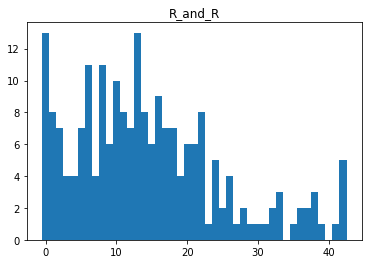

In [274]:
  plt.hist(notifCount['R_and_R'], bins=np.r_[-.5:43:1])
  plt.title('R_and_R')
  plt.show()

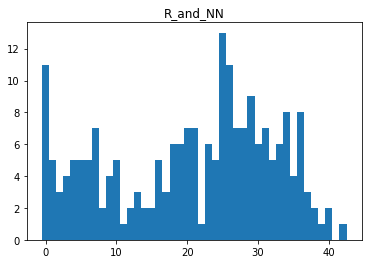

In [275]:
plt.hist(notifCount['R_and_NN'], bins=np.r_[-.5:43:1])
plt.title('R_and_NN')
plt.show()

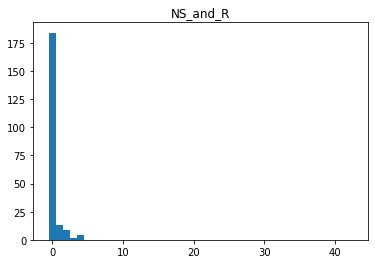

In [276]:
plt.hist(notifCount['NS_and_R'], bins=np.r_[-.5:43:1])
plt.title('NS_and_R')
plt.show()

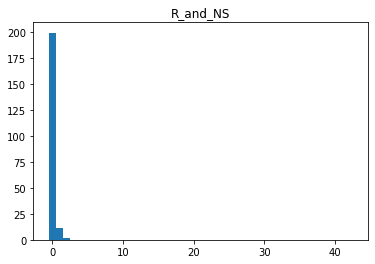

In [277]:
plt.hist(notifCount['R_and_NS'], bins=np.r_[-.5:43:1])
plt.title('R_and_NS')
plt.show()

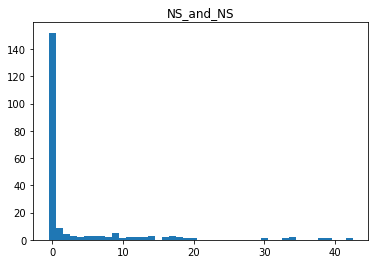

In [278]:
plt.hist(notifCount['NS_and_NS'], bins=np.r_[-.5:43:1])
plt.title('NS_and_NS')
plt.show()

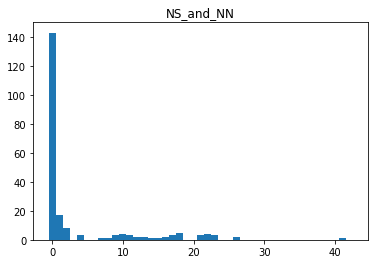

In [279]:
plt.hist(notifCount['NS_and_NN'], bins=np.r_[-.5:43:1])
plt.title('NS_and_NN')
plt.show()

In [280]:
passedReceipt=notifCount[(notifCount['NS_and_NN']<5)].index
# & (notifCount['NS_and_NS']<10)

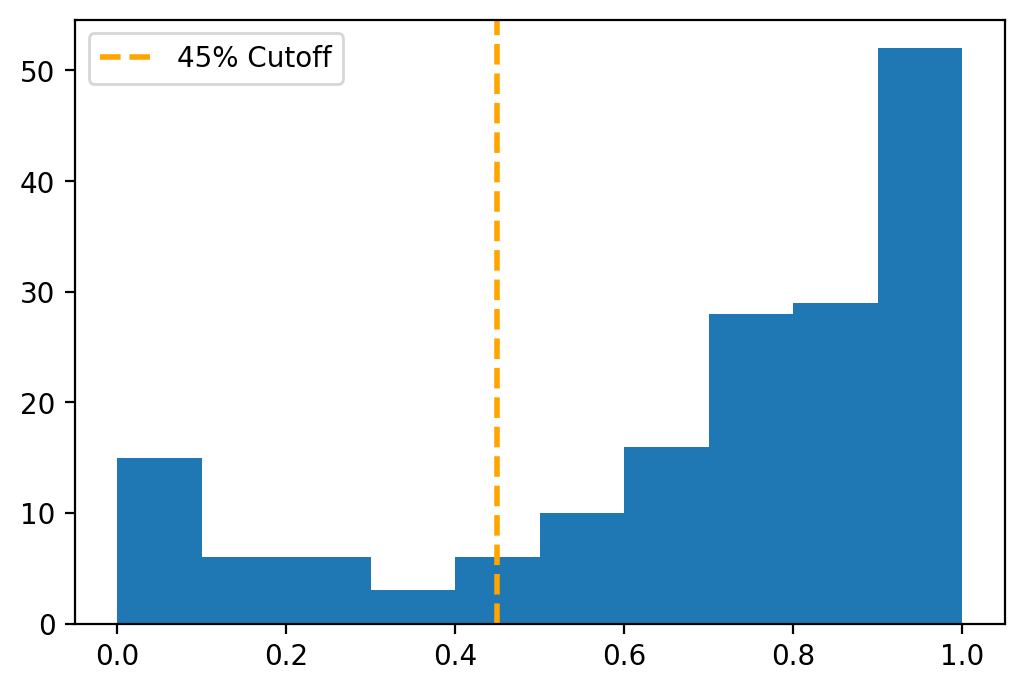

In [281]:
# Example: Higher resolution histogram
plt.figure(dpi=200)
plt.hist(trkData.loc[passedReceipt, :]['EMA Overall Response Rate'])
plt.axvline(0.45, color='orange', linestyle='--', lw=2, label='45% Cutoff')
plt.legend()
plt.show()

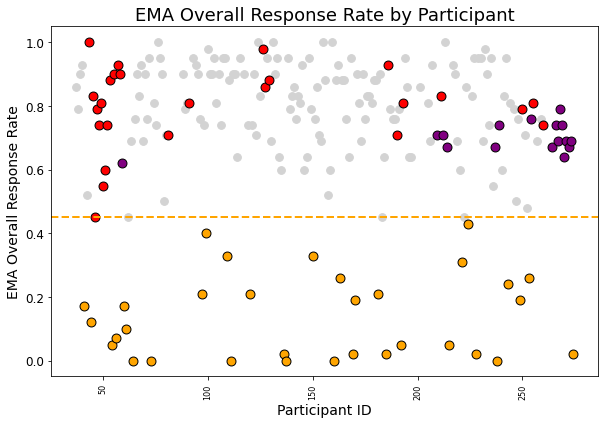

In [282]:
# --- Highlight Participants by Exclusion Criteria on EMA Overall Response Rate Plot ---

plt.figure(figsize=(10, 6))

# Plot all participants as grey by default
plt.scatter(trkData.index, trkData['EMA Overall Response Rate'], color='lightgrey', label='Included (passes all criteria)', s=60)

# Overlay excluded participants
for pid in trkData.index:
    rate = trkData.loc[pid, 'EMA Overall Response Rate']
    color = None
    label = None
    # Orange: >55% non-response (rate < 0.45)
    if rate < 0.45:
        color = 'orange'
        label = ' >55% non-response'
    # Red: NS_and_NN >= 5
    # Purple: NS_and_NS >= 10
    elif notifCount.loc[pid, 'NS_and_NS'] >= 10:
        color = 'purple'
        label = '≥10 NS_and_NS '
    elif notifCount.loc[pid, 'NS_and_NN'] >= 5:
        color = 'red'
        label = '≥5 NS_and_NN'
    
    if color:
        plt.scatter(pid, rate, color=color, s=80, edgecolor='black')

plt.title('EMA Overall Response Rate by Participant', fontsize=18)
plt.xlabel('Participant ID', fontsize=14)
plt.ylabel('EMA Overall Response Rate', fontsize=14)
plt.xticks(rotation=90, fontsize=8)
plt.yticks(fontsize=12)
plt.axhline(0.45, color='orange', linestyle='--', lw=2, label='55% Non-response Threshold')

# Build legend with color explanations, place it outside the plot area
handles = [
    plt.Line2D([0], [0], marker='o', color='w', label='Included (passes all criteria)', markerfacecolor='lightgrey', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Excluded: >55% non-response (rate < 0.45)', markerfacecolor='orange', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Excluded: ≥5 NS_and_NN (missed notifications)', markerfacecolor='red', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', label='Excluded: ≥10 NS_and_NS (missed surveys)', markerfacecolor='purple', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], color='orange', lw=2, linestyle='--', label='55% Non-response Threshold')
]

""" plt.legend(handles=handles, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title='Legend: Color Meaning') """
plt.tight_layout(rect=[0, 0, 0.85, 1])  # Make space for legend on the right
plt.show()

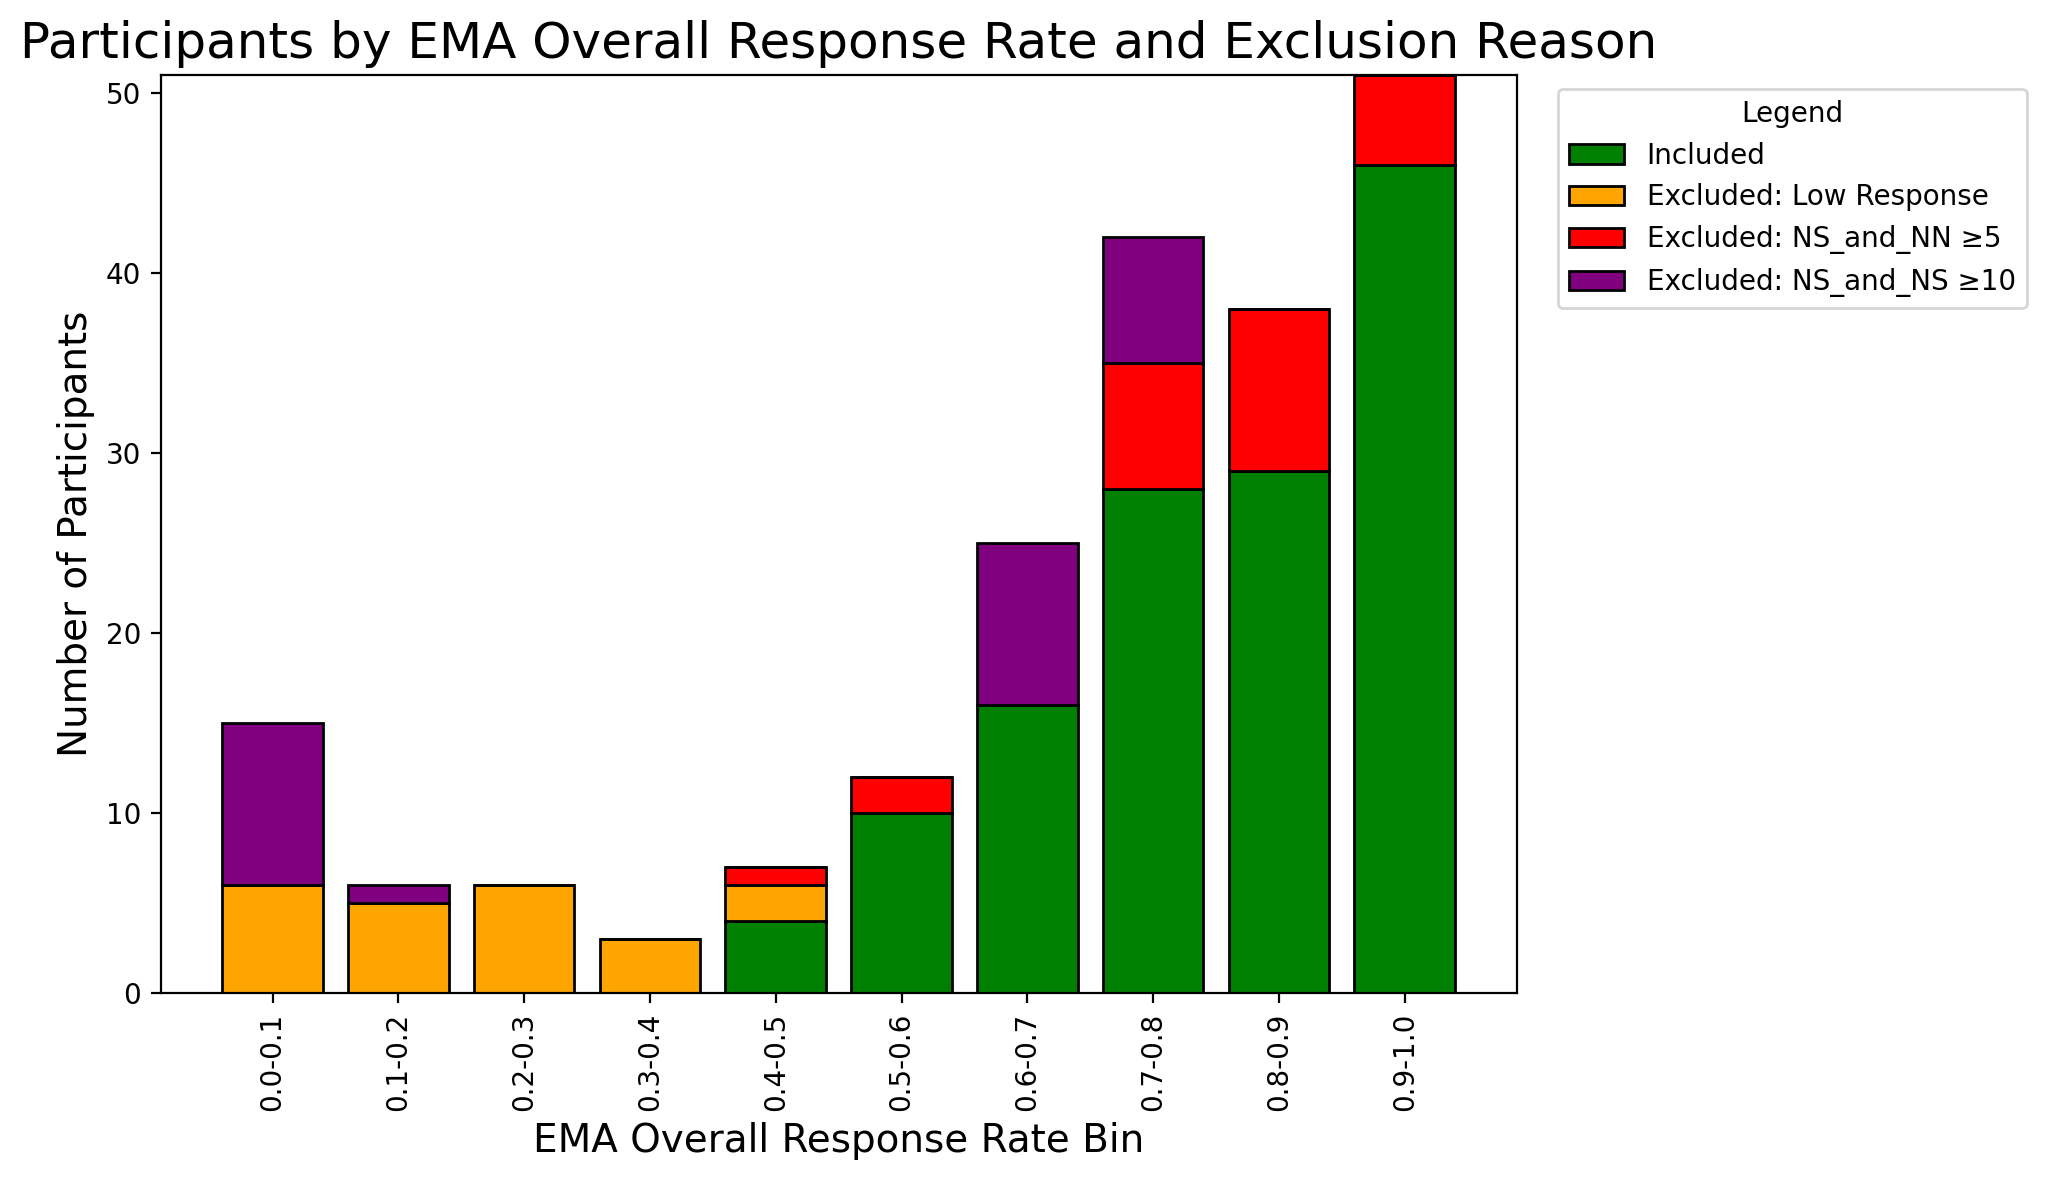

In [283]:
# --- Stacked Bar Histogram of EMA Overall Response Rate with Exclusion Reasons ---

import numpy as np
import matplotlib.pyplot as plt

# 1. Define bins for response rate
bins = np.arange(0, 1.05, 0.1)
bin_labels = [f"{b:.1f}-{b+0.1:.1f}" for b in bins[:-1]]  # e.g., '0.0-0.1', '0.1-0.2', ...

# 2. Classify each participant
def classify(pid):
    rate = trkData.loc[pid, 'EMA Overall Response Rate']
    if notifCount.loc[pid, 'NS_and_NS'] >= 10:
        return 'NS_and_NS ≥10'
    elif rate < 0.45:
        return 'Low Response (<0.45)'
    elif notifCount.loc[pid, 'NS_and_NN'] >= 5:
        return 'NS_and_NN ≥5'
    else:
        return 'Included'

trkData['ExclusionReason'] = [classify(pid) for pid in trkData.index]

# 3. Bin participants and count by exclusion reason
hist_data = {reason: np.zeros(len(bins)-1, dtype=int) for reason in ['Included', 'Low Response (<0.45)', 'NS_and_NN ≥5', 'NS_and_NS ≥10']}
for pid, row in trkData.iterrows():
    rate = row['EMA Overall Response Rate']
    reason = row['ExclusionReason']
    bin_idx = np.digitize(rate, bins) - 1
    if 0 <= bin_idx < len(bins)-1:
        hist_data[reason][bin_idx] += 1

# 4. Plot stacked bar chart
fig, ax = plt.subplots(figsize=(12, 6), dpi=200)
bottom = np.zeros(len(bins)-1)
colors = {
    'Included': 'green',
    'Low Response (<0.45)': 'orange',
    'NS_and_NN ≥5': 'red',
    'NS_and_NS ≥10': 'purple'
}
labels = {
    'Included': 'Included',
    'Low Response (<0.45)': 'Excluded: Low Response',
    'NS_and_NN ≥5': 'Excluded: NS_and_NN ≥5',
    'NS_and_NS ≥10': 'Excluded: NS_and_NS ≥10'
}
for reason in ['Included', 'Low Response (<0.45)', 'NS_and_NN ≥5', 'NS_and_NS ≥10']:
    ax.bar(bin_labels, hist_data[reason], bottom=bottom, color=colors[reason], label=labels[reason], edgecolor='black')
    bottom += hist_data[reason]

ax.set_xlabel('EMA Overall Response Rate Bin', fontsize=14)
ax.set_ylabel('Number of Participants', fontsize=14)
ax.set_title('Participants by EMA Overall Response Rate and Exclusion Reason', fontsize=18)
ax.legend(title='Legend', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

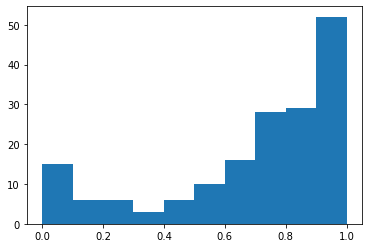

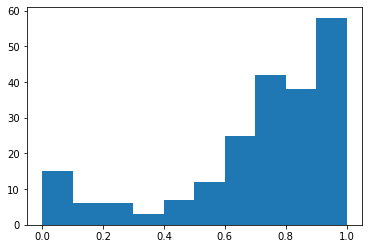

In [284]:
plt.hist(trkData.loc[passedReceipt,:]['EMA Overall Response Rate'])
plt.show()
plt.hist(trkData['EMA Overall Response Rate'])
plt.show()


In [285]:
pr_trkData=trkData.loc[passedReceipt,:]

In [286]:
print(f'median response rate: {pr_trkData["EMA Overall Response Rate"].median()}')
MAD3=np.abs(pr_trkData['EMA Overall Response Rate']-pr_trkData['EMA Overall Response Rate'].median()).median()*3
print(f'median absolute deviation times 3: {MAD3}')

median response rate: 0.79
median absolute deviation times 3: 0.42000000000000004


In [287]:
final_trkData=pr_trkData.loc[pr_trkData['EMA Overall Response Rate']>(pr_trkData['EMA Overall Response Rate'].median()-MAD3),:]

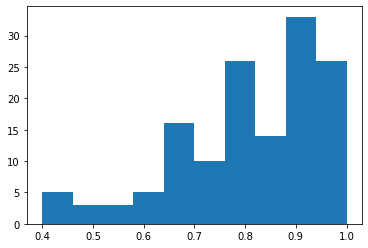

In [288]:
plt.hist(final_trkData['EMA Overall Response Rate'])
plt.show()

In [289]:
pr_trkData.shape[0]-final_trkData.shape[0]

30

In [290]:
((notifCount['NS_and_NN']>5) | (notifCount['NS_and_NS']>10)).sum()

51

In [291]:
(notifCount['NS_and_NN']>5).sum()

41

In [292]:
trkData[((notifCount['NS_and_NN']<5) & (notifCount['NS_and_NS']>10))]

,Date Contacted,Date of Initial Contact,Participant Notes,ExpiWell ID,Age\nMean: 31.78,"Sex At Birth\nM119, F92",EMA StartDate,EMA Overall Response Rate,Final Survey Completion Date,$$ Owed\nTotal: $3839.50,ExclusionReason
Participant ID Count: 212,,,,,,,,,,,
44,5/7/24,NaN,NaN,663a4a61390031c62138e3e3,21.0,Female,5/7/24,0.12,NaN,$2.50,NS_and_NS ≥10
54,5/7/24,NaN,NaN,663c206d390031c621427319,26.0,Female,5/9/24,0.05,NaN,$1.00,NS_and_NS ≥10
56,5/10/24,NaN,NaN,663e43da390031c6214c2301,29.0,Female,5/10/24,0.07,NaN,$1.50,NS_and_NS ≥10
64,5/14/24,NaN,NSC--M(NRS),664384b1442523ed87908849,30.0,Male,5/14/24,0.00,NaN,$0.00,NS_and_NS ≥10
137,5/20/24,5/18/24,NaN,664f2b5b93e5001a12b6b476,32.0,Male,5/23/24,0.00,NaN,$0.00,NS_and_NS ≥10
160,5/22/24,NaN,M,664e22d720f19dd3213b91f5,36.0,Male,5/24/24,0.00,NaN,$0.00,NS_and_NS ≥10
185,5/25/24,5/22/24,NaN,664ddb58cfaa164d863aeca5,40.0,Male,5/26/24,0.02,NaN,$0.50,NS_and_NS ≥10
192,5/25/24,NaN,NaN,6642793a390031c6215f0cfa,31.0,Male,5/26/24,0.05,NaN,$1.00,NS_and_NS ≥10
228,5/27/24,NaN,NaN,66552703bb8cfd1298e773ef,26.0,Female,5/27/24,0.02,NaN,$0.50,NS_and_NS ≥10


In [293]:
# Preprocess tcqData
tcqData=pd.read_csv('data/TCQ_numeric.csv')
tcqData.columns=tcqData.loc[3,:]
tcqData=tcqData.iloc[4:,:]
tcqData=tcqData.drop(columns=['Finished', 'Location - Lat', 'Location - Long', 'No Login', 'ip address'])
tcqData.dropna(axis=1, how='all', inplace=True)
tcqData.columns=list(tcqData.loc[:,:'Duration (in seconds)'].columns)+['expiwellID', 'Participant ID', 'onTask',	'visImag',	'inSpeech',	'intent',	'struct',	'real',	'concAbs',	'import',	'relGoal',	'fullDev',	'oftMind',	'emotVal',	'tempOr',	'funct',	'functOth']
tcqData=tcqData[tcqData.expiwellID.isin(final_trkData['ExpiWell ID'])]
tcqData['Participant ID']=tcqData['Participant ID'].str.split(' ', expand=True,n=1).loc[:,1].astype(int)
for col in tcqData.loc[:,'onTask':'funct'].columns:
  tcqData[col]=pd.to_numeric(tcqData[col])



In [294]:
len(tcqData['Participant ID'].unique())

141

In [295]:
# Calculate Mind Wandering Rate Per Participant
MWctr=pd.DataFrame(index=final_trkData.index,columns=['MWcnt','MWrate'])
for ptpt in tcqData['Participant ID'].unique():
  tmpDat=tcqData[tcqData["Participant ID"]==ptpt]
  # print(f'{ptpt} MWR: {(tmpDat.onTask>1).sum()/tmpDat.shape[0]:0.2f}')
  MWctr.loc[ptpt,'MWrate']=(tmpDat.onTask>1).sum()/tmpDat.shape[0]
  MWctr.loc[ptpt,'MWcnt']=(tmpDat.onTask>1).sum()

final_trkData=final_trkData.join(MWctr)

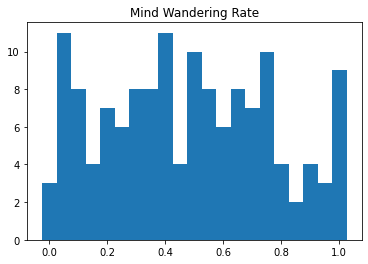

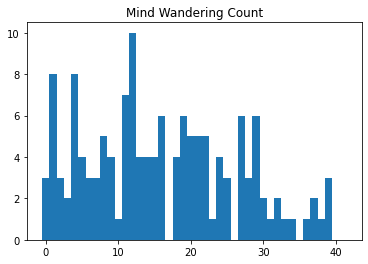

In [296]:
plt.hist(final_trkData.MWrate, bins=np.r_[-.025:1.05:.05])
plt.title('Mind Wandering Rate')
plt.show()
plt.hist(final_trkData.MWcnt, bins=np.r_[-.5:42.5:1])
plt.title('Mind Wandering Count')
plt.show()

In [297]:

#get the length and colnames
print(f"Shape: {tcqData.shape}")
print(f"Columns: {tcqData.columns.tolist()}")

#but we shoudl subset for the participatns whose mind was actually wandering, so ontask >1
#tcqData=tcqData[tcqData['onTask']>1]

#Lets include tempOr for now

tcq_cols = ['visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 'import', 'relGoal','fullDev', 'oftMind', 'emotVal', 'tempOr']

#drop rows with NaN in any of the tcq_cols
#tcqData = tcqData.dropna(subset=tcq_cols)

#Create within and between dataframes
within = tcqData.copy()
within[tcq_cols] = within.groupby("expiwellID")[tcq_cols].transform(lambda x: x - x.mean())

between = tcqData.copy()
between = between.groupby("expiwellID")[tcq_cols].mean()
between

Shape: (4773, 21)
Columns: ['Start Date', 'End Date', 'Time Scheduled', 'Duration (in seconds)', 'expiwellID', 'Participant ID', 'onTask', 'visImag', 'inSpeech', 'intent', 'struct', 'real', 'concAbs', 'import', 'relGoal', 'fullDev', 'oftMind', 'emotVal', 'tempOr', 'funct', 'functOth']


,visImag,inSpeech,intent,struct,real,concAbs,import,relGoal,fullDev,oftMind,emotVal,tempOr
expiwellID,,,,,,,,,,,,
63e2ad274808cf0b46699b50,2.333333,3.666667,5.500000,2.500000,4.500000,6.000000,1.833333,1.000000,4.333333,2.500000,3.666667,1.833333
6445278e4e3d850b4c16a86a,3.200000,2.200000,2.600000,2.800000,3.000000,3.200000,3.400000,3.400000,3.600000,3.200000,4.400000,2.600000
645d56298a4f2e5f727a6e7b,3.909091,5.090909,4.437500,4.187500,4.968750,4.250000,4.437500,4.406250,4.562500,4.656250,4.125000,3.125000
6460232c7931520b527193f3,1.421053,4.368421,3.684211,2.894737,4.578947,4.315789,2.105263,1.684211,2.421053,1.526316,3.842105,3.263158
6478fe9fec109b0b53d222c2,4.250000,4.312500,5.187500,3.250000,4.000000,4.000000,3.187500,2.187500,3.625000,2.625000,5.250000,2.875000
...,...,...,...,...,...,...,...,...,...,...,...,...
66561a83166f80d151621a86,4.687500,5.156250,5.250000,5.250000,4.531250,5.000000,5.062500,4.843750,4.875000,5.281250,5.281250,3.531250
6656291abb8cfd1298ed64db,4.772727,5.272727,4.272727,4.318182,5.136364,4.681818,5.272727,3.454545,4.363636,4.409091,4.681818,2.636364
66563921bb8cfd1298eded48,4.333333,5.416667,5.666667,5.250000,6.166667,6.250000,4.583333,2.583333,6.000000,3.583333,5.166667,2.500000


In [298]:
preQDat=pd.read_csv('data/Mind+Wandering_EMA_FINAL_February+18,+2025_18.53.csv')[2:]
preQDat=preQDat[preQDat['Finished']=='1']
postQDat=pd.read_csv('data/Mind+Wandering+Final+Survey_FINAL_February+18,+2025_18.55.csv')[2:]

In [299]:
len(postQDat)

277

In [300]:
preQDat.set_index('EID', inplace=True)
postQDat.set_index('EID', inplace=True)


In [301]:
postQDat = postQDat[postQDat['Progress'] == '100']
postQDat = postQDat[postQDat.index.isin(between.index)]

postQDat = postQDat.sort_values('EndDate', ascending=True)
postQDat = postQDat[~postQDat.index.duplicated(keep='first')]

In [302]:
len(postQDat)

138

In [303]:
preQDat.loc[list(final_trkData['ExpiWell ID']),:].index[preQDat.loc[list(final_trkData['ExpiWell ID']),:].index.duplicated()]

Index(['664fc1e6e0fe3a9553b349fa'], dtype='object', name='EID')

In [304]:
#Remove 1st response
preQDat.loc['664fc1e6e0fe3a9553b349fa'].iloc[:,:50]

,StartDate,EndDate,Status,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Income,Handedness,Education,Education_10_TEXT,Meds,Diags,Therapy,ASD,ToldASD,FormalASD
EID,,,,,,,,,,,,,,,,,,,,,
664fc1e6e0fe3a9553b349fa,2024-05-23 21:48:38,2024-05-23 21:57:08,0,100,510,1,2024-05-23 21:57:11,R_6U6rWE8nJ9UyWLf,anonymous,EN,...,6,1,10,NaN,"Vivitrol, Pristiq, Depakote, Wellbutrin, Crest...",Major Depressive Disorder Mild\nAnxiety Disorder,21,2,NaN,NaN
664fc1e6e0fe3a9553b349fa,2024-05-23 22:05:40,2024-05-23 22:08:29,0,100,169,1,2024-05-23 22:08:30,R_308JKB1uFK2YYzT,anonymous,EN,...,6,1,7,NaN,"Vibitrol, Wellbutrin, Buspar, Pristiq, Creator...","Depression, Anxiety",21,2,NaN,NaN


In [305]:
# --- Step 1: Score all BSI Dimensions ---

# Define items for all 9 BSI dimensions + Global Index
bsi_dimensions = {
    'Somatization': ['BSI_2', 'BSI_7', 'BSI_23', 'BSI_29', 'BSI_30', 'BSI_33', 'BSI_37'], 
    'Obsession': ['BSI_5', 'BSI_15', 'BSI_26', 'BSI_27', 'BSI_32', 'BSI_36'], 
    'Interpersonal_Sensitivity': ['BSI_20', 'BSI_21', 'BSI_22', 'BSI_42'], 
    'Depression': ['BSI_9', 'BSI_16', 'BSI_17', 'BSI_18', 'BSI_35', 'BSI_50'], 
    'Anxiety': ['BSI_1', 'BSI_12', 'BSI_19', 'BSI_38', 'BSI_45', 'BSI_49'], 
    'Hostility': ['BSI_6', 'BSI_13', 'BSI_40',  'BSI_41','BSI_46'], 
    'Phobic_Anxiety': ['BSI_8', 'BSI_28', 'BSI_31', 'BSI_43', 'BSI_47'],
    'Paranoid_Ideation': ['BSI_4', 'BSI_10', 'BSI_24', 'BSI_48', 'BSI_51'],
    'Psychoticism': ['BSI_3', 'BSI_14', 'BSI_34', 'BSI_44', 'BSI_53']
}

# Ensure all BSI columns are numeric and calculate sum scores for each dimension
bsi_score_cols = []
for dim, items in bsi_dimensions.items():
    score_col = f'BSI_{dim}'
    bsi_score_cols.append(score_col)
    
    # Ensure columns are numeric, coercing errors
    for item_col in items:
        if item_col in postQDat.columns:
            postQDat[item_col] = pd.to_numeric(postQDat[item_col], errors='coerce')
    
    # Get list of items that actually exist in the dataframe
    existing_items = [item for item in items if item in postQDat.columns]
    if existing_items:
        postQDat[score_col] = postQDat[existing_items].sum(axis=1, skipna=True)
    else:
        postQDat[score_col] = np.nan
        print(f"Warning: No items found for BSI dimension '{dim}'. Score will be all NaN.")

# Calculate Global Score (sum of all 53 items)
bsi_global_cols = [f'BSI_{i}' for i in range(1, 54) if i != 46]
existing_global_cols = [col for col in bsi_global_cols if col in postQDat.columns]
postQDat[existing_global_cols] = postQDat[existing_global_cols].apply(pd.to_numeric, errors='coerce')
postQDat['BSI_Global'] = postQDat[existing_global_cols].sum(axis=1, skipna=True)
bsi_score_cols.append('BSI_Global')

In [306]:
len(postQDat)

138

In [307]:
# --- Score IPIP-NEO-60 Personality Data ---

# --- Step 1: Define the exact global order of NEO item columns ---
# This list is based on the specific column names you provided.
ordered_neo_columns = [
    'NEO_1_1', 'NEO_1_2', 'NEO_1_3', 'NEO_1_4', 'NEO_1_5', 'NEO_1_6', 'NEO_1_7', 'NEO_1_8', 'NEO_1_9', 'NEO_1_10',
    'NEO_2_1', 'NEO_2_2', 'NEO_2_3', 'NEO_2_4', 'NEO_2_5', 'NEO_2_6', 'NEO_2_7', 'NEO_2_8', 'NEO_2_9', 'NEO_2_10', 'NEO_2_11',
    'NEO_3_1', 'NEO_3_2', 'NEO_3_3', 'NEO_3_4', 'NEO_3_5', 'NEO_3_6', 'NEO_3_7', 'NEO_3_8', 'NEO_3_9', 'NEO_3_10',
    'NEO_4_1', 'NEO_4_2', 'NEO_4_3', 'NEO_4_4', 'NEO_4_5', 'NEO_4_6', 'NEO_4_7', 'NEO_4_8', 'NEO_4_9', 'NEO_4_10',
    'NEO_5_1', 'NEO_5_2', 'NEO_5_3', 'NEO_5_4', 'NEO_5_5', 'NEO_5_6', 'NEO_5_7', 'NEO_5_8', 'NEO_5_9', 'NEO_5_10', 'NEO_5_11',
    'NEO_6_1', 'NEO_6_2', 'NEO_6_3', 'NEO_6_4', 'NEO_6_5', 'NEO_6_6', 'NEO_6_7', 'NEO_6_8', 'NEO_6_9', 'NEO_6_10'
]

# Define the specific column names to be excluded from scoring
excluded_neo_items = ['NEO_2_6', 'NEO_5_8']

# --- Step 2: Apply the scoring key using the defined order ---

# Define the item numbers for each personality domain based on the global 1-60 order
ipip_domain_items = {
    'Neuroticism': list(range(1, 13)),
    'Extraversion': list(range(13, 25)),
    'Openness': list(range(25, 37)),
    'Agreeableness': list(range(37, 49)),
    'Conscientiousness': list(range(49, 61))
}

# Define the GLOBAL item numbers that need to be reverse-coded
ipip_reverse_coded_items = {
    'Neuroticism': [9, 10, 11, 12],
    'Extraversion': [16],
    'Openness': [28, 30, 31, 32, 33, 34, 36],
    'Agreeableness': [39, 40, 43, 44, 45, 46],
    'Conscientiousness': [52, 54, 58, 59, 60]
}

# Assuming a 5-point scale (1-5), so reverse coding is (5+1) - score = 6 - score.
REVERSE_CODING_CONSTANT = 6

# Initialize score columns
for domain in ipip_domain_items.keys():
    postQDat[f'ipip_neo_{domain.lower()}'] = 0

# Loop through each domain to calculate its score
for domain, global_item_list in ipip_domain_items.items():
    domain_score_col = f'ipip_neo_{domain.lower()}'
    
    for global_item_num in global_item_list:
        # Find the column name corresponding to the global item number
        # The list is 0-indexed, so we subtract 1 from the global item number
        if global_item_num <= len(ordered_neo_columns):
            item_col = ordered_neo_columns[global_item_num - 1]
            
            # Skip this item if it's in the exclusion list
            if item_col in excluded_neo_items:
                continue

            if item_col in postQDat.columns:
                # Convert column to numeric, coercing errors to NaN
                item_scores = pd.to_numeric(postQDat[item_col], errors='coerce')
                
                # Check if the current global item number needs to be reverse-coded
                if global_item_num in ipip_reverse_coded_items.get(domain, []):
                    item_scores = REVERSE_CODING_CONSTANT - item_scores
                
                # Add the item's score to the domain's total score, treating NaNs as 0
                postQDat[domain_score_col] += item_scores.fillna(0)
            else:
                print(f"Warning: IPIP item column '{item_col}' (Global Item {global_item_num}) not found and will be skipped.")
        else:
            print(f"Warning: Global item {global_item_num} is out of range for the provided column list and will be skipped.")

# Display the first few rows with the new score columns to verify
print("\nIPIP-NEO-60 scores calculated and added to postQDat:")
display(postQDat[['ipip_neo_neuroticism', 'ipip_neo_extraversion', 'ipip_neo_openness', 'ipip_neo_agreeableness', 'ipip_neo_conscientiousness']].head())


IPIP-NEO-60 scores calculated and added to postQDat:


,ipip_neo_neuroticism,ipip_neo_extraversion,ipip_neo_openness,ipip_neo_agreeableness,ipip_neo_conscientiousness
EID,,,,,
662c23eb984be5dc85b1f907,41,44,28,40,38
662c1a3e984be5dc85b1ac7c,33,32,33,44,34
663413e56d0b687e4df00efd,32,34,35,37,32
6633d9a6d05d24da8bf2f215,38,35,28,36,31
66394fd7442523ed8761623e,37,43,39,37,39


In [308]:

# --- Step 1: Score the Interpersonal Reactivity Index (IRI) ---

# Define the items for each IRI subscale
iri_subscales = {
    'Perspective_Taking': [3, 8, 11, 15, 21, 25, 28],
    'Fantasy': [1, 5, 7, 12, 16, 23, 26],
    'Empathic_Concern': [2, 4, 9, 14, 18, 20, 22],
    'Personal_Distress': [6, 10, 13, 17, 19, 24, 27]
}

# Define which items need to be reverse-scored
iri_reverse_score_items = {3, 4, 7, 12, 13, 14, 15, 18, 19}

# IRI is a 5-point scale (1-5), so reverse coding is (5+1) - score = 6 - score.
IRI_REVERSE_CODING_CONSTANT = 6

# Calculate the mean score for each subscale
for subscale, items in iri_subscales.items():
    subscale_col = f'iri_{subscale}'
    
    # Create a temporary DataFrame to hold the scores for the current subscale's items
    item_scores_df = pd.DataFrame()
    
    for item_num in items:
        item_col = f'IRI_{item_num}'
        if item_col in postQDat.columns:
            # Convert column to numeric, coercing errors
            scores = pd.to_numeric(postQDat[item_col], errors='coerce')
            
            # Reverse score if necessary
            if item_num in iri_reverse_score_items:
                scores = IRI_REVERSE_CODING_CONSTANT - scores
            
            item_scores_df[item_col] = scores
        else:
            print(f"Warning: IRI column '{item_col}' not found and will be skipped.")
            
    # Calculate the mean score across the items for each participant (row)
    # skipna=False means if any item is missing, the mean will be NaN
    if not item_scores_df.empty:
        postQDat[subscale_col] = item_scores_df.mean(axis=1, skipna=False)


In [309]:
ids_in_tcq = tcqData['expiwellID'].unique()
preQDat_sorted = preQDat.loc[ids_in_tcq]

In [310]:
len(tcqData['expiwellID'].unique())

141

In [311]:
len(postQDat)

138

In [312]:
import pandas as pd

# Select columns starting with 'Q26'
# Get all Q26 columns that start with 'Q26' and do NOT end with '_time'
q26_cols = [col for col in postQDat.columns if col.startswith('Q26') and not col.endswith('_time')]
def convert_to_time(val, is_start):
    if val == 1 or pd.isna(val):
        return None  # Doesn't work
    val = int(val)
    if is_start:
        hour = val - 2  # Start: 2=00:00, 3=01:00, ..., 25=23:00
    else:
        hour = val - 1  # End: 2=01:00, 3=02:00, ..., 24=23:00
    if hour < 1 or hour > 24:
        return None
    return f"{hour:02d}:00"

for col in q26_cols:
    parts = col.split('#')[1].split('_')
    is_start = parts[0] == '1'
    new_col = f"{col}_time"
    postQDat[new_col] = postQDat[col].apply(lambda x: convert_to_time(x, is_start))

print("Converted Q26 columns to 24hr time format:")
display(postQDat[[col for col in postQDat.columns if col.endswith('_time')]].head())

Converted Q26 columns to 24hr time format:


,Q26#1_1_time,Q26#1_2_time,Q26#1_3_time,Q26#1_4_time,Q26#1_5_time,Q26#1_6_time,Q26#1_7_time,Q26#2_1_time,Q26#2_2_time,Q26#2_3_time,Q26#2_4_time,Q26#2_5_time,Q26#2_6_time,Q26#2_7_time
EID,,,,,,,,,,,,,,
662c23eb984be5dc85b1f907,09:00,09:00,09:00,09:00,09:00,None,None,17:00,17:00,17:00,16:00,14:00,None,None
662c1a3e984be5dc85b1ac7c,08:00,08:00,08:00,08:00,10:00,None,None,18:00,18:00,14:00,12:00,16:00,None,None
663413e56d0b687e4df00efd,08:00,08:00,08:00,08:00,None,None,06:00,16:00,16:00,16:00,16:00,None,None,15:00
6633d9a6d05d24da8bf2f215,None,None,None,None,None,None,None,None,None,None,None,None,None,None
66394fd7442523ed8761623e,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [313]:
# Export main DataFrames from this notebook to the data folder, this maintains the pipeline structure so


import os
os.makedirs("data", exist_ok=True)

export_dfs = {
    "final_trkData": final_trkData,
    "tcqData": tcqData,
    "notifCount": notifCount,
    "MWctr": MWctr,
    "preQDat": preQDat,
    "postQDat": postQDat,
}

for name, df in export_dfs.items():
    df.to_csv(f"data/{name}.csv")
    print(f"Exported {name} to data/{name}.csv")

Exported final_trkData to data/final_trkData.csv
Exported tcqData to data/tcqData.csv
Exported notifCount to data/notifCount.csv
Exported MWctr to data/MWctr.csv
Exported preQDat to data/preQDat.csv
Exported postQDat to data/postQDat.csv
